In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
data.shape

(23486, 11)

In [4]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [8]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
data["Title"].fillna('UnKnown',inplace=True)
data["Review Text"].fillna('No Description Is Available',inplace=True)
data["Division Name"].fillna('UnKnown',inplace=True)
data["Department Name"].fillna('UnKnown',inplace=True)
data["Class Name"].fillna('UnKnown',inplace=True)

In [10]:
# rating counts
rating=data["Rating"].value_counts().reset_index()
rating

,Rating,count
0,5,13131
1,4,5077
2,3,2871
3,2,1565
4,1,842


### Visual Analysis

##### 1. Cloth Department Analysis

In [12]:
# department counts
department_name=data["Department Name"].value_counts().reset_index()
department_name

,Department Name,count
0,Tops,10468
1,Dresses,6319
2,Bottoms,3799
3,Intimate,1735
4,Jackets,1032
5,Trend,119
6,UnKnown,14


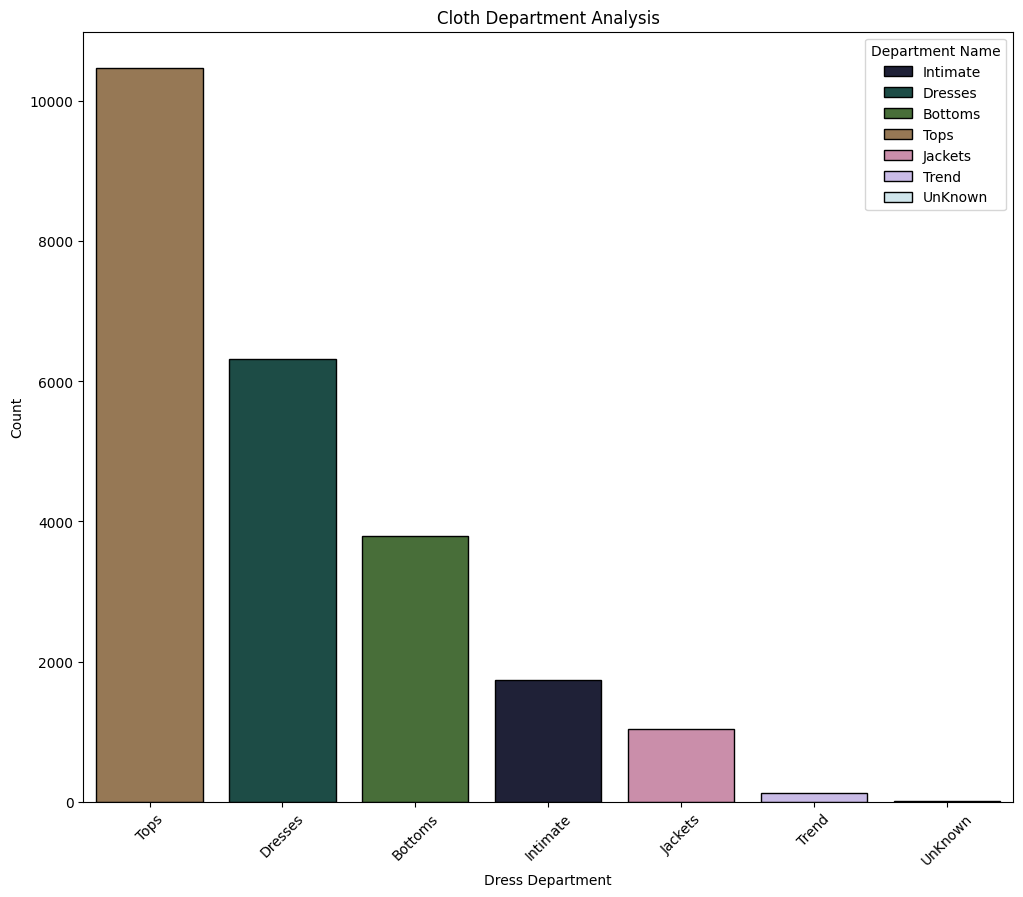

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(x="Department Name",data=data,hue="Department Name",palette="cubehelix",order=data['Department Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Department Analysis")
plt.show()

##### 2. Cloth Department By Rating

In [75]:
table=pd.crosstab(index=data["Department Name"],columns=data["Rating"])
table

Rating,1,2,3,4,5
Department Name,,,,,
Bottoms,115,205,421,785,2273
Dresses,228,461,838,1395,3397
Intimate,63,90,178,371,1033
Jackets,49,60,91,201,631
Tops,376,738,1324,2299,5731
Trend,11,11,19,26,52
UnKnown,0,0,0,0,14


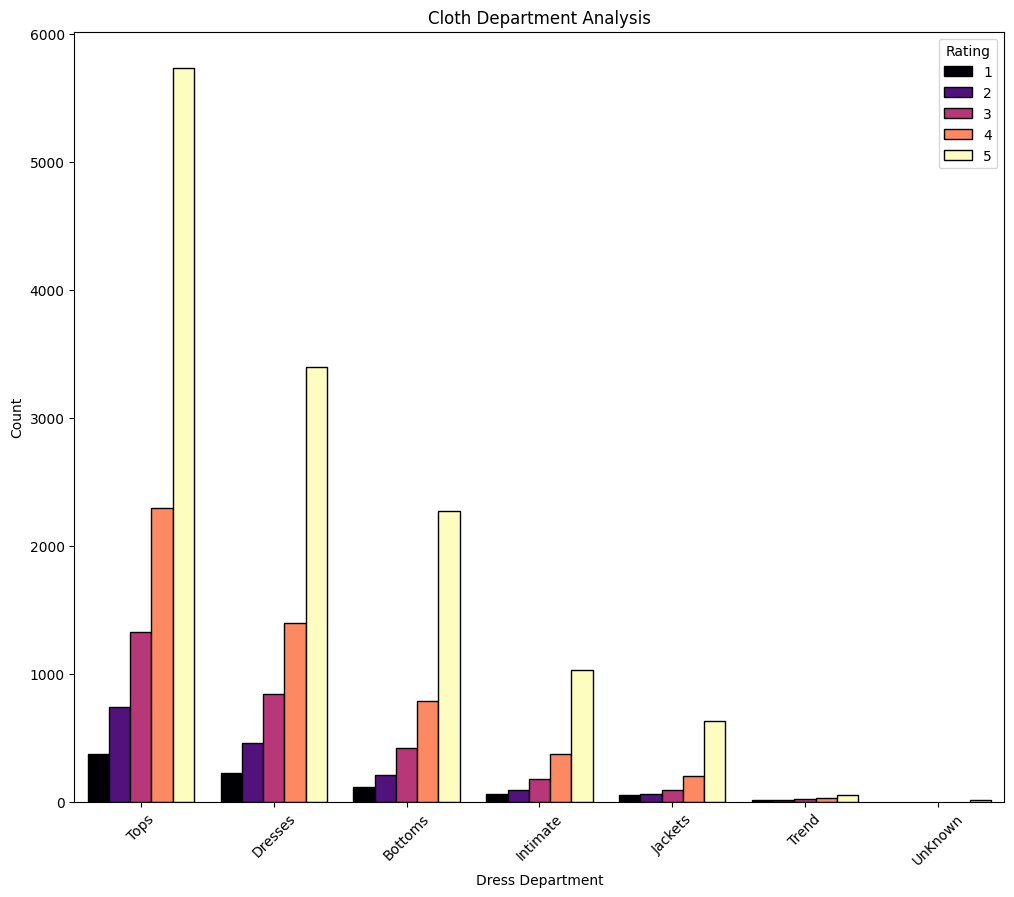

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(x="Department Name",data=data,hue="Rating",palette="magma",saturation=2,order=data['Department Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Department Analysis")
plt.show()

##### 3. Cloth Department By Age and Recommendation

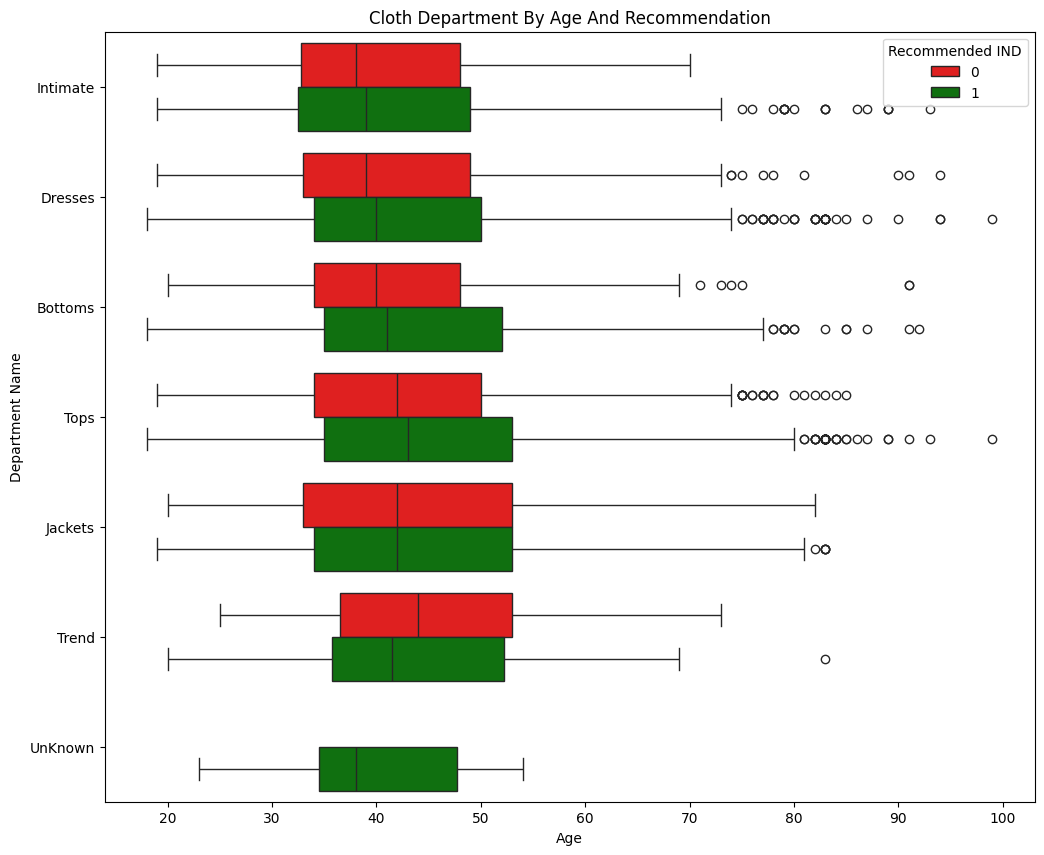

In [15]:
plt.figure(figsize=(12,10))
colors=['red','green']
sns.boxplot(x='Age',y='Department Name',data=data,palette=colors,hue="Recommended IND")
plt.title("Cloth Department By Age And Recommendation")
plt.show()

##### 4. Cloth Department Distribution

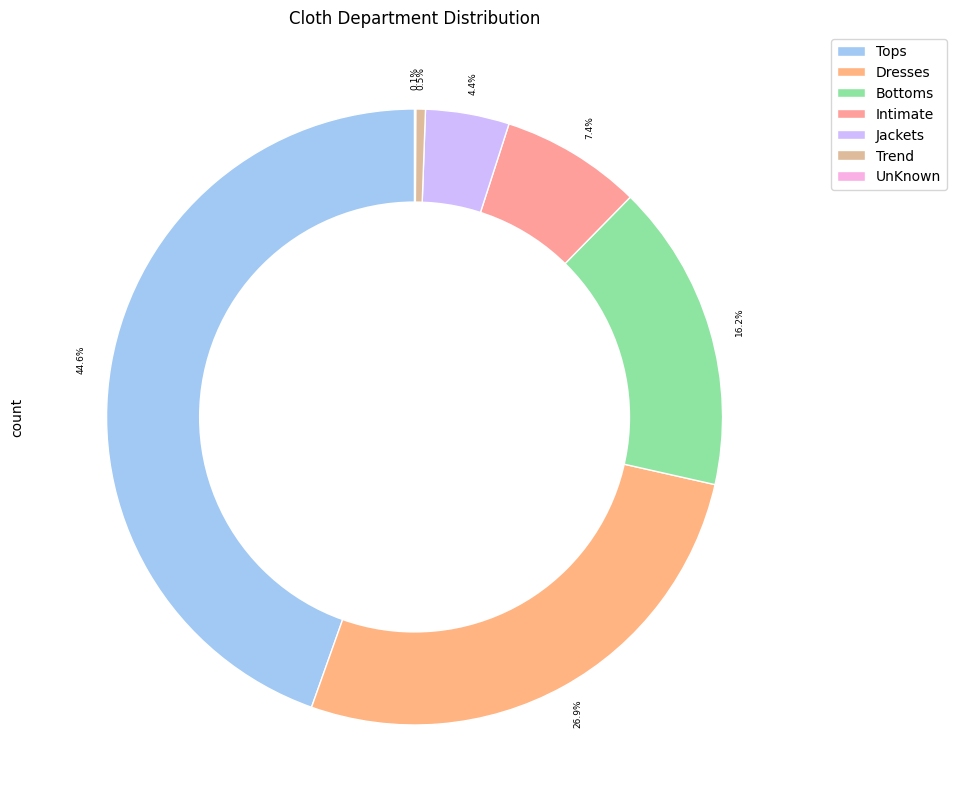

In [61]:
colors = sns.color_palette("pastel")[0:len(department_name)]
plt.figure(figsize=(12,10))
data["Department Name"].value_counts().plot(kind='pie',labels=None, autopct="%1.1f%%", pctdistance=1.1,colors=colors,wedgeprops=dict(width=1, edgecolor='white'), startangle=90,textprops=dict(rotation=90,size=6.5) )
plt.title("Cloth Department Distribution")
plt.legend(labels=department_name['Department Name'], loc='upper right', bbox_to_anchor=(1.2, 1))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 5. Cloth Department By Age and Recommendations

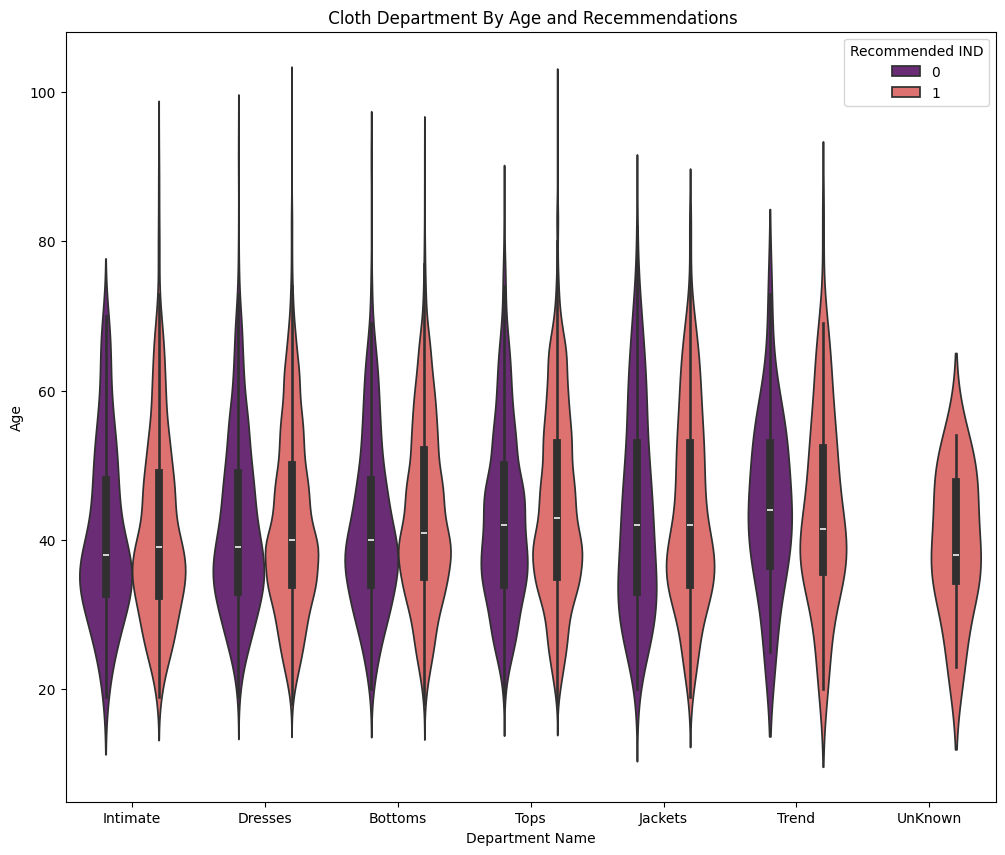

In [65]:
plt.figure(figsize=(12,10))
sns.violinplot(x="Department Name",y="Age",data=data,hue='Recommended IND', palette='magma',orient='v')
plt.title(" Cloth Department By Age and Recemmendations")
plt.show()

##### 6. Cloth Class Analysis

In [66]:
class_name=data["Class Name"].value_counts().reset_index()
class_name

,Class Name,count
0,Dresses,6319
1,Knits,4843
2,Blouses,3097
3,Sweaters,1428
4,Pants,1388
5,Jeans,1147
6,Fine gauge,1100
7,Skirts,945
8,Jackets,704
9,Lounge,691


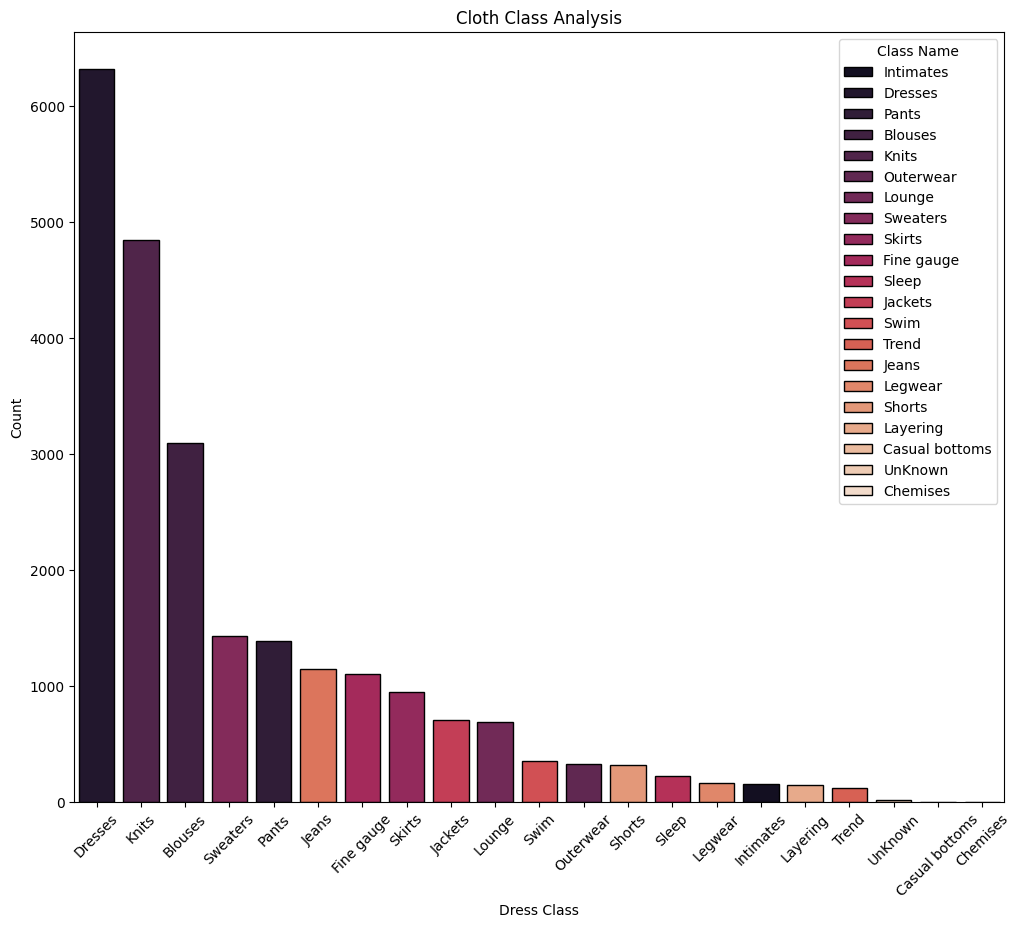

In [68]:
plt.figure(figsize=(12,10))
sns.countplot(x="Class Name",data=data,hue="Class Name",palette="rocket",order=data['Class Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Class Analysis")
plt.show()

##### 7. Cloth Class Analysis By Rating

In [74]:
table=pd.crosstab(index=data["Class Name"],columns=data["Rating"])
table

Rating,1,2,3,4,5
Class Name,,,,,
Blouses,119,229,394,669,1686
Casual bottoms,0,0,0,1,1
Chemises,0,0,0,1,0
Dresses,228,461,838,1395,3397
Fine gauge,30,75,119,230,646
Intimates,7,8,16,27,96
Jackets,35,38,62,118,451
Jeans,30,55,115,218,729
Knits,178,328,616,1132,2589


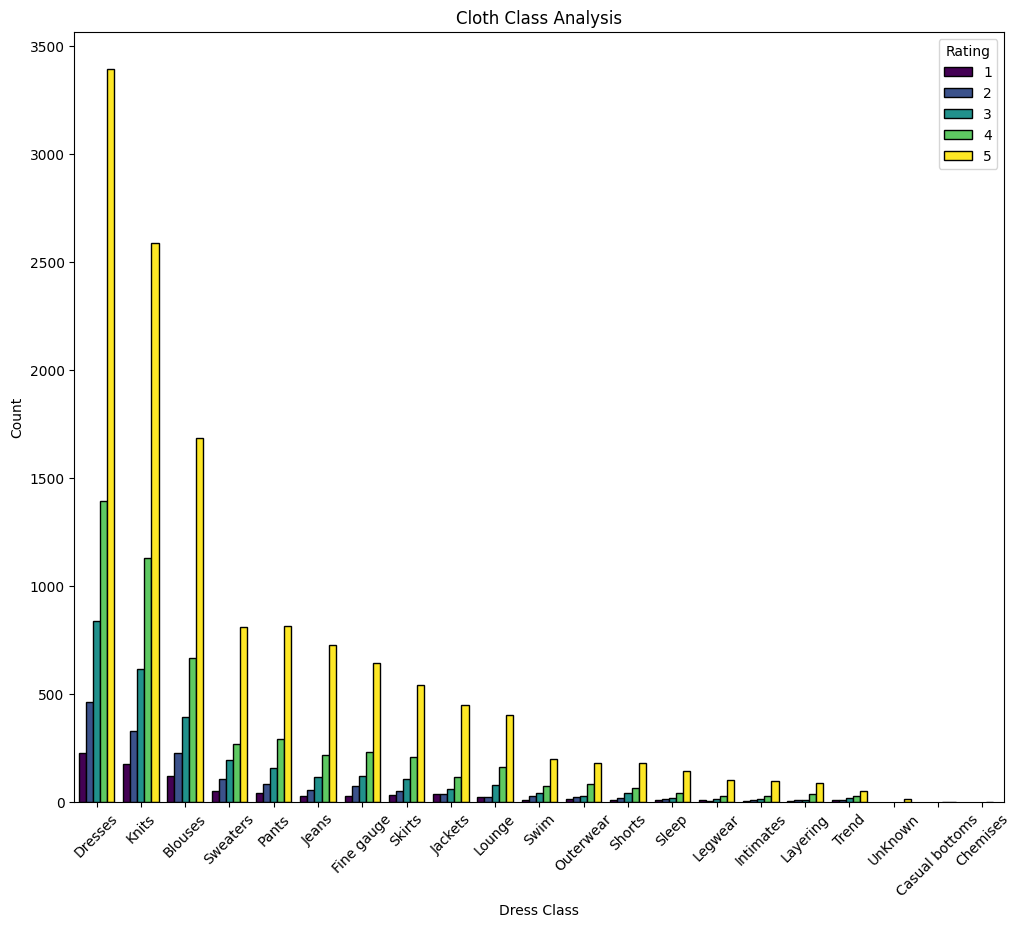

In [72]:
plt.figure(figsize=(12,10))
sns.countplot(x="Class Name",data=data,hue="Rating",palette="viridis",saturation=2,order=data['Class Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Class Analysis")
plt.show()

##### 8. Cloth Class Distribution

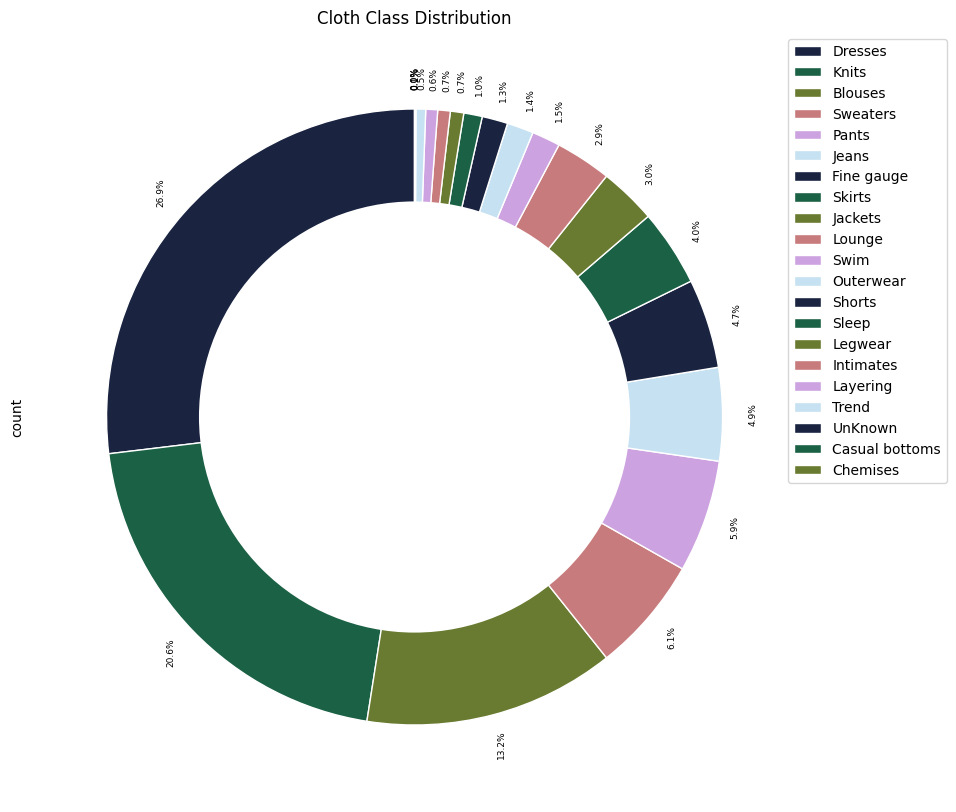

In [78]:
colors = sns.color_palette("cubehelix")[0:len(class_name)]
plt.figure(figsize=(12,10))
data["Class Name"].value_counts().plot(kind='pie',labels=None, autopct="%1.1f%%", pctdistance=1.1,colors=colors,wedgeprops=dict(width=1, edgecolor='white'), startangle=90,textprops=dict(rotation=90,size=6.5) )
plt.title("Cloth Class Distribution")
plt.legend(labels=class_name['Class Name'], loc='upper right', bbox_to_anchor=(1.2, 1))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 9. Cloth Class By Age And Recommendations

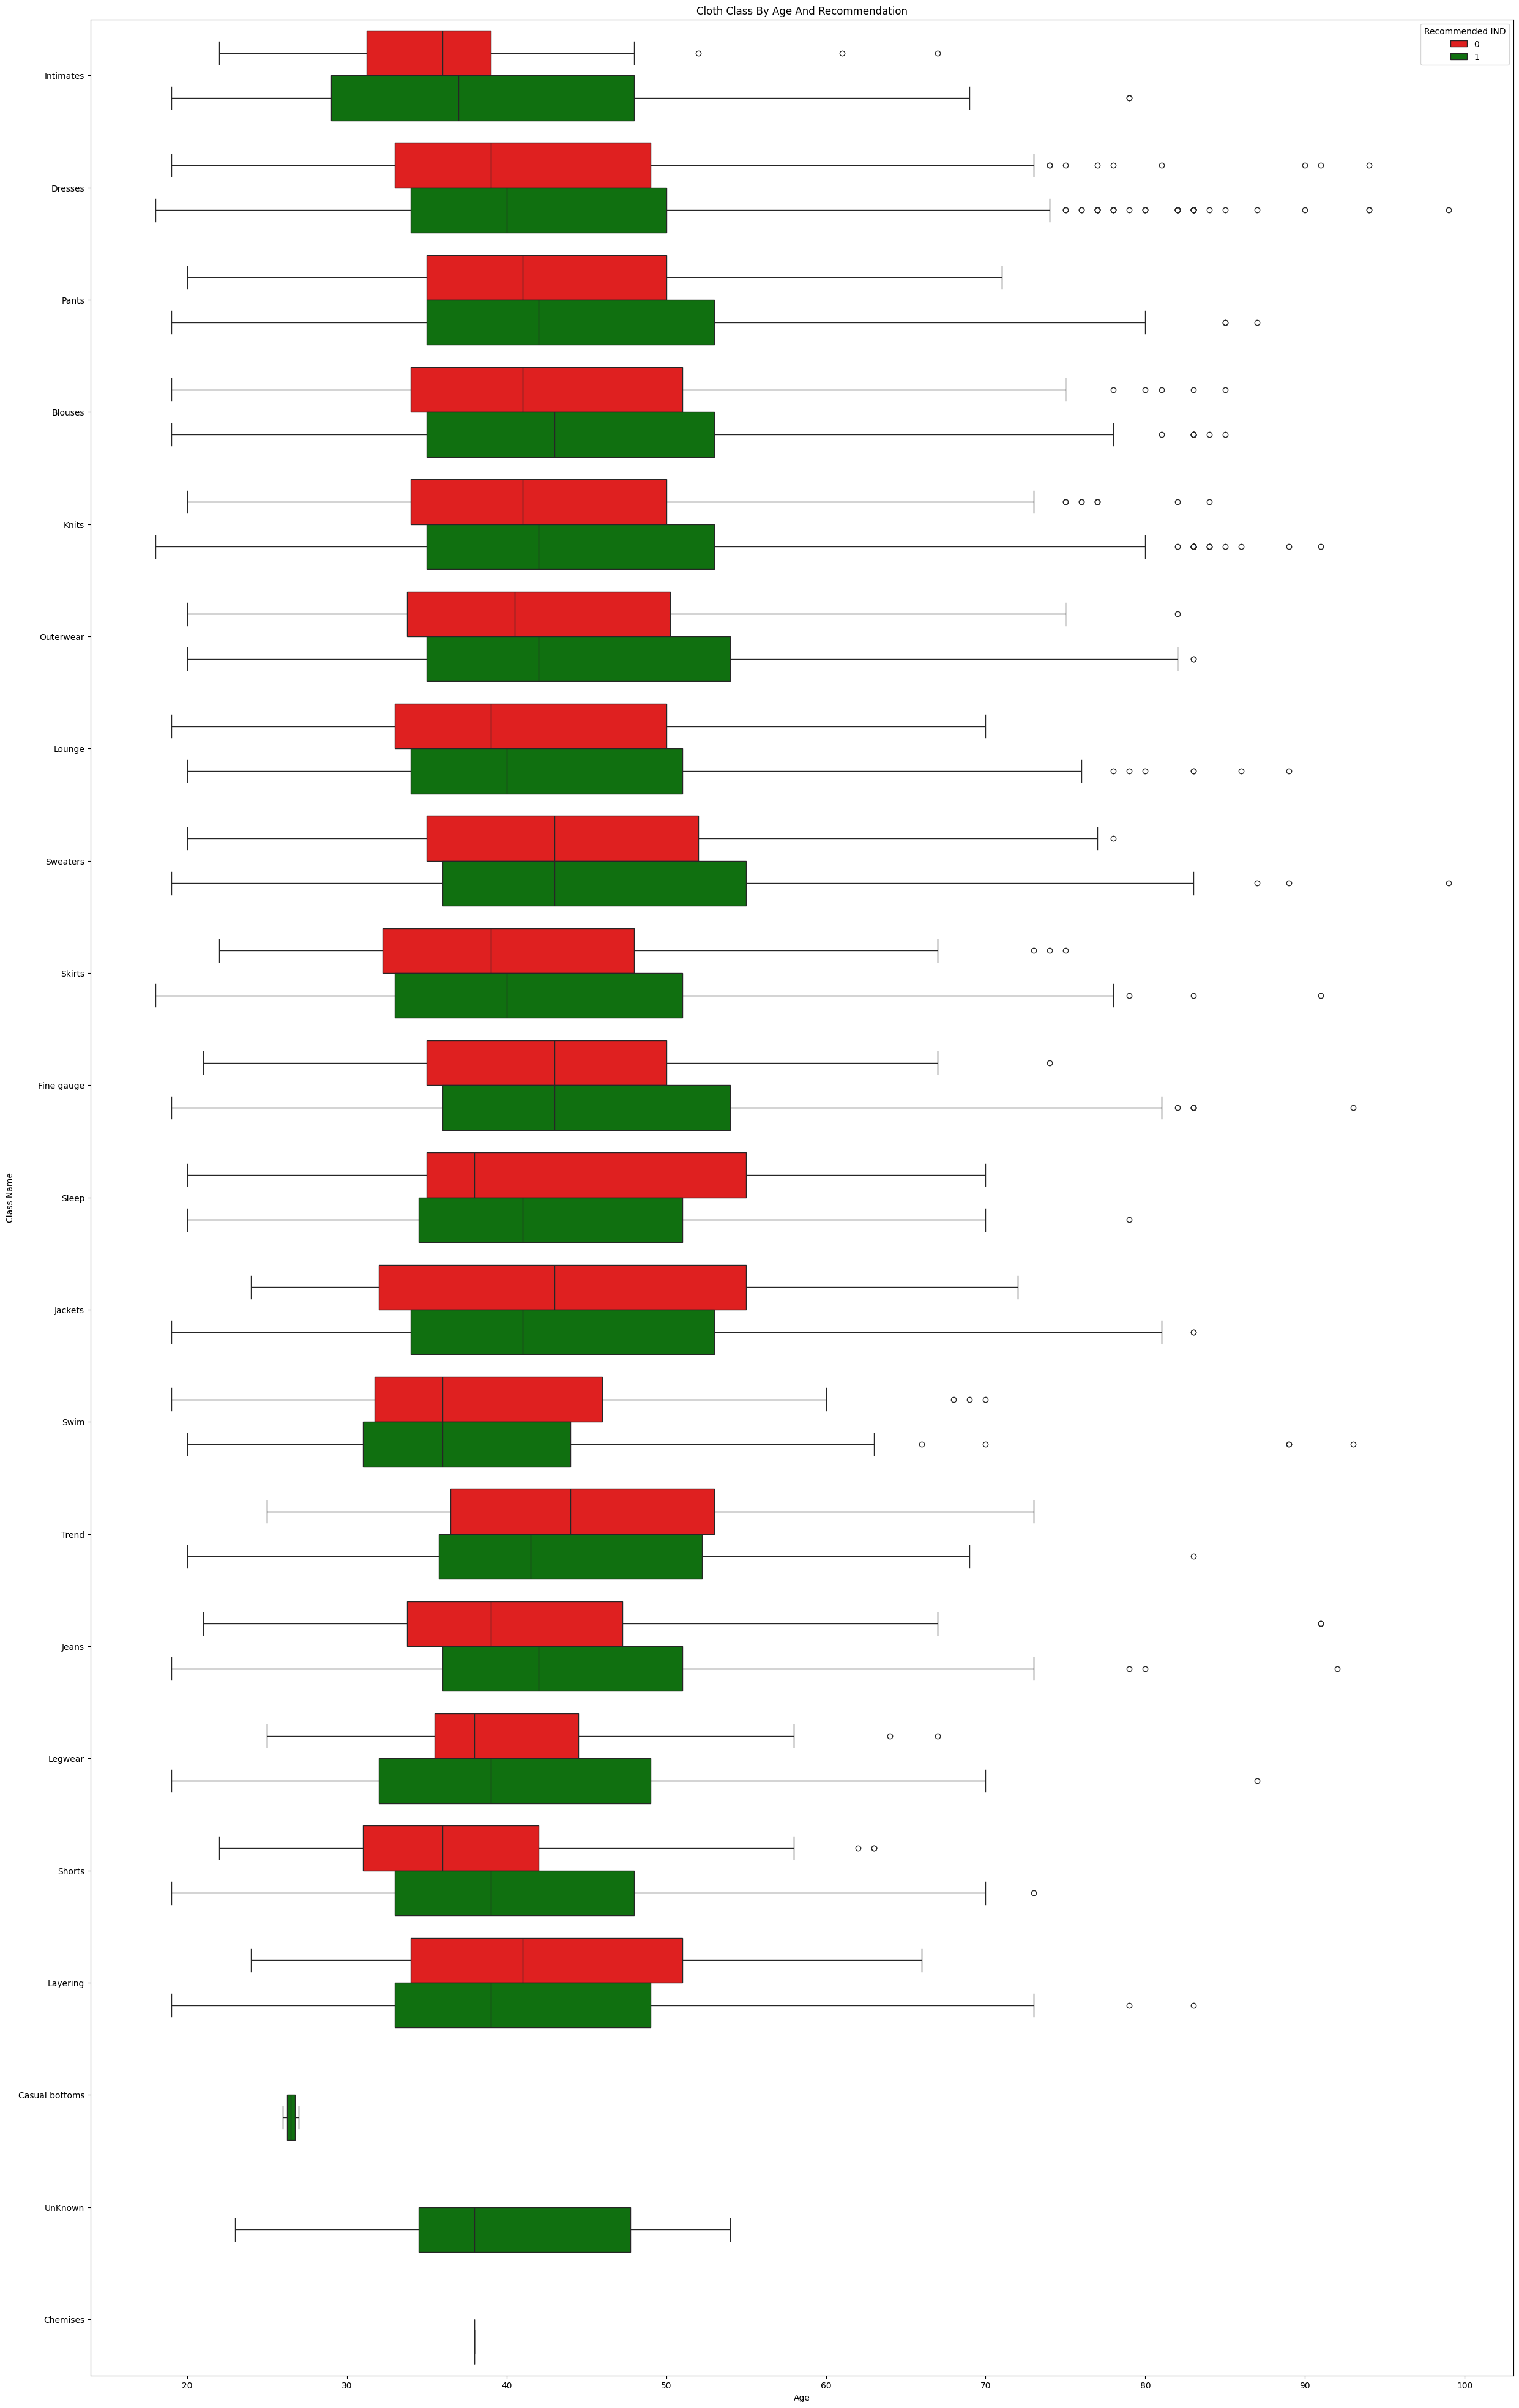

In [84]:
plt.figure(figsize=(30,50))
colors=['red','green']
sns.boxplot(x='Age',y='Class Name',data=data,palette=colors,hue="Recommended IND")
plt.title("Cloth Class By Age And Recommendation")
plt.show()

##### 10. Cloth Division Analysis

In [85]:
division_name=data["Division Name"].value_counts().reset_index()
division_name

,Division Name,count
0,General,13850
1,General Petite,8120
2,Initmates,1502
3,UnKnown,14


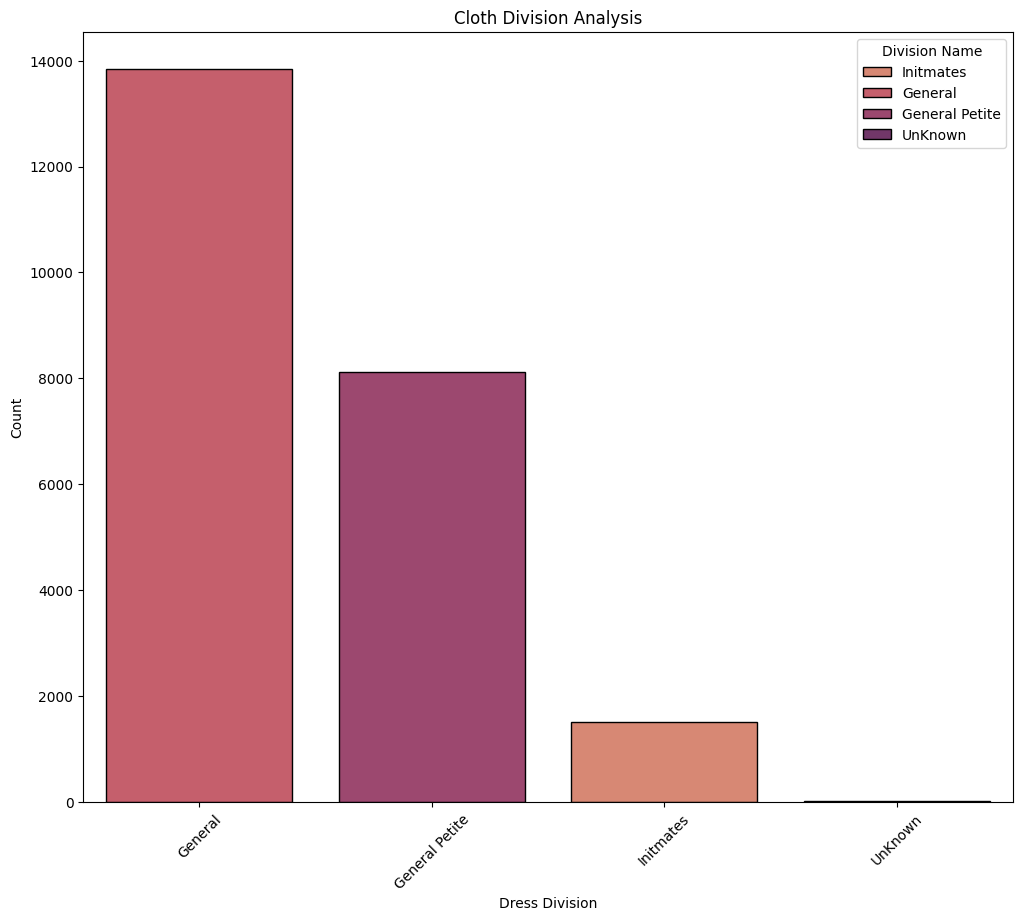

In [87]:
plt.figure(figsize=(12,10))
sns.countplot(x="Division Name",data=data,hue="Division Name",palette="flare",order=data['Division Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Division")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Division Analysis")
plt.show()

##### 11. Cloth Division Analysis By Department

In [90]:
division_grp=data.groupby('Division Name')["Department Name"].value_counts()
division_grp

Division Name   Department Name
General         Tops               6837
                Dresses            3730
                Bottoms            2542
                Jackets             645
                Trend                96
General Petite  Tops               3631
                Dresses            2589
                Bottoms            1257
                Jackets             387
                Intimate            233
                Trend                23
Initmates       Intimate           1502
UnKnown         UnKnown              14
Name: count, dtype: int64

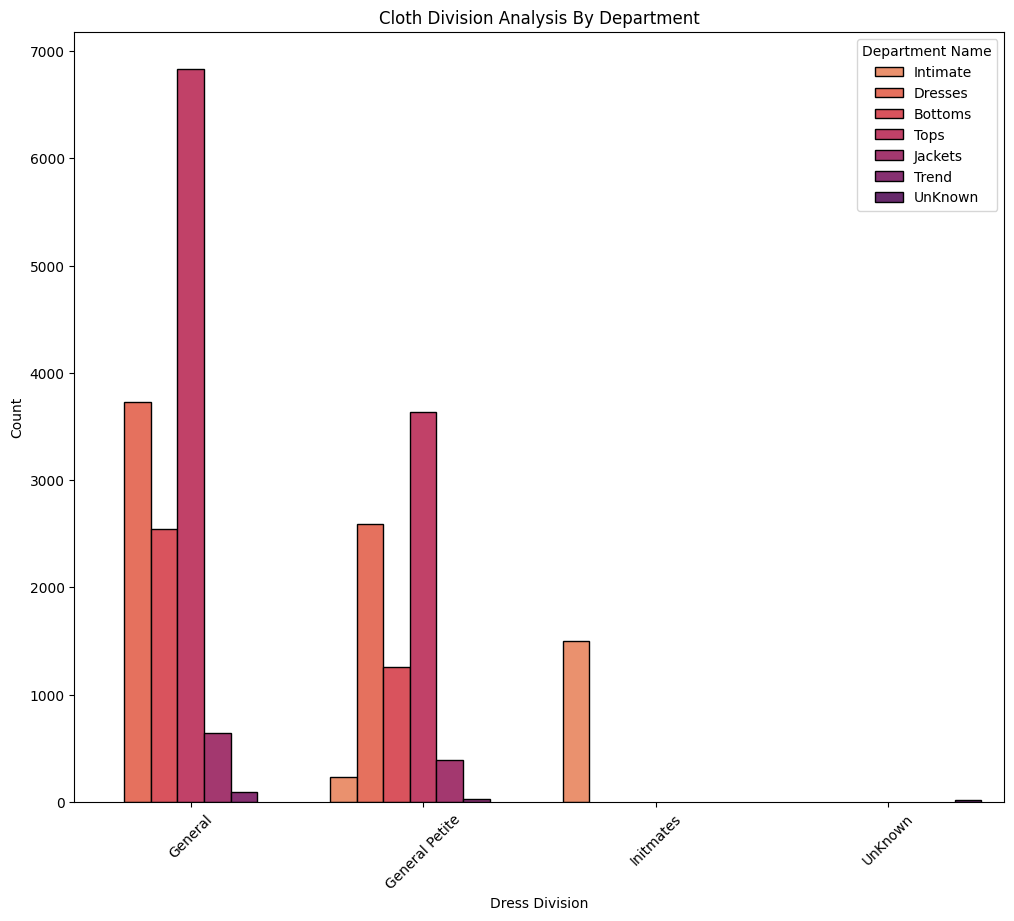

In [92]:
plt.figure(figsize=(12,10))
sns.countplot(x="Division Name",data=data,hue="Department Name",palette="flare",saturation=2,order=data['Division Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Division")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Division Analysis By Department")
plt.show()

##### 12. Cloth Division Analysis By Rating

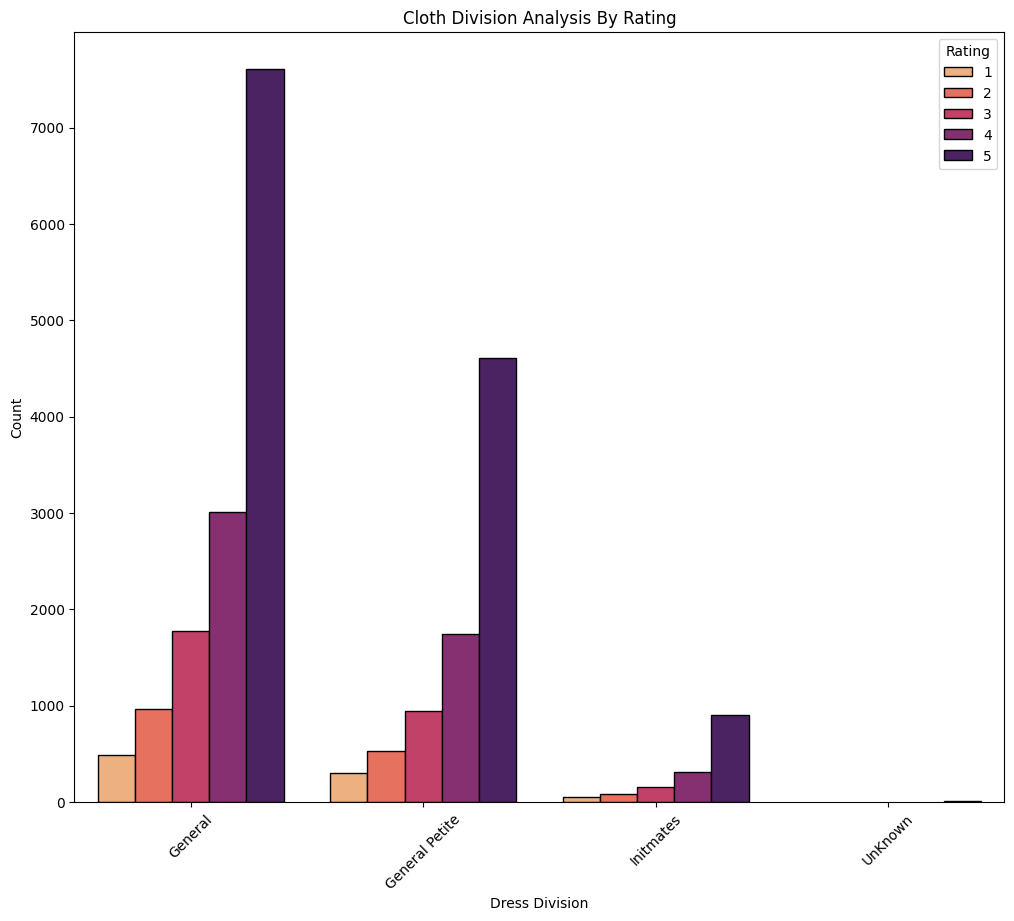

In [93]:
plt.figure(figsize=(12,10))
sns.countplot(x="Division Name",data=data,hue="Rating",palette="flare",saturation=2,order=data['Division Name'].value_counts().index,edgecolor='black',linewidth=1,legend=True)
plt.xlabel("Dress Division")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cloth Division Analysis By Rating")
plt.show()

##### 13. Cloth Division Percentage

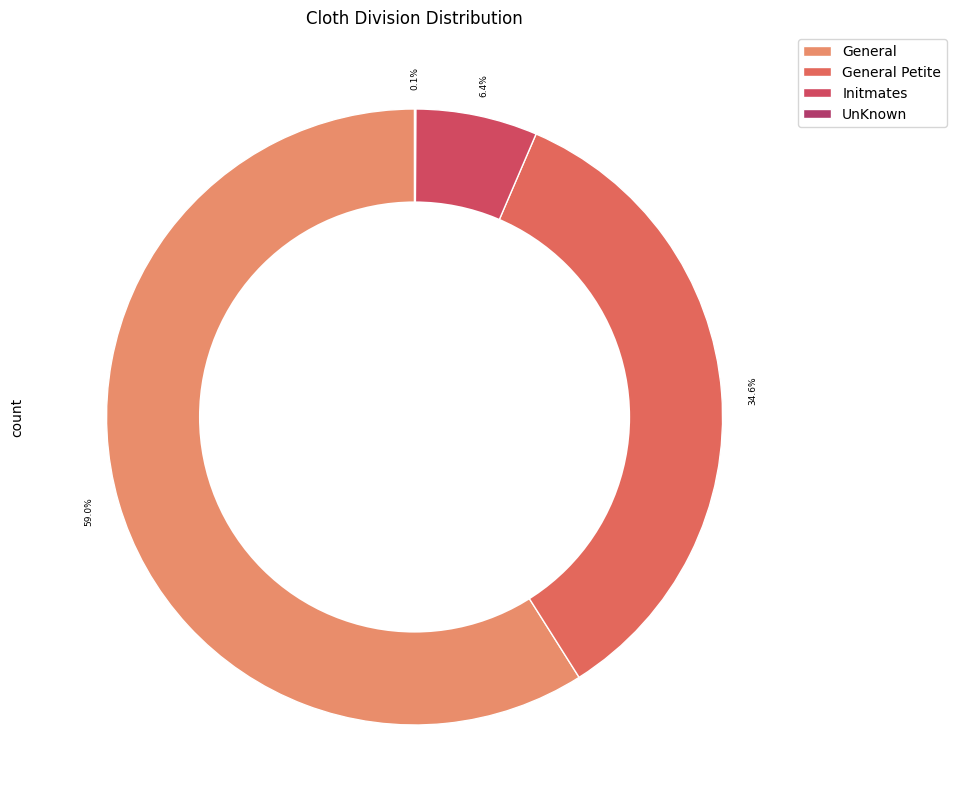

In [95]:
colors = sns.color_palette("flare")[0:len(division_name)]
plt.figure(figsize=(12,10))
data["Division Name"].value_counts().plot(kind='pie',labels=None, autopct="%1.1f%%", pctdistance=1.1,colors=colors,wedgeprops=dict(width=1, edgecolor='white'), startangle=90,textprops=dict(rotation=90,size=6.5) )
plt.title("Cloth Division Distribution")
plt.legend(labels=division_name['Division Name'], loc='upper right', bbox_to_anchor=(1.2, 1))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 14. Cloth Division By Age And Recommendations

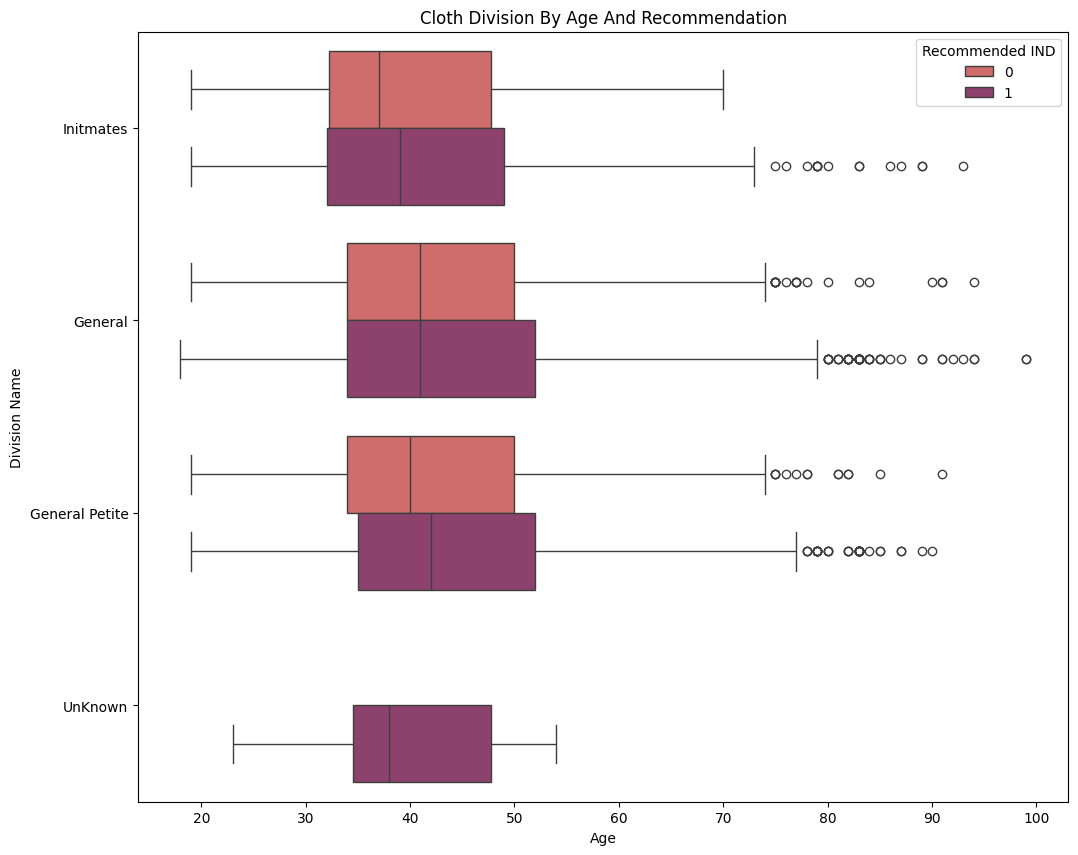

In [97]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Age',y='Division Name',data=data,palette='flare',hue="Recommended IND")
plt.title("Cloth Division By Age And Recommendation")
plt.show()